In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import sklearn as sk
import sklearn.linear_model
import os

import PlaceCellAnalysis as pc
import utilities as u
import preprocessing as pp
import behavior as b
import BayesianDecoding as bd

os.sys.path.append("C:\\Users\\mplitt\\CensoredLstsq")
os.sys.path.append("")

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
mice = ['4139190.1','4139190.3','4139212.2','4139219.2','4139219.3','4139224.2','4139224.3','4139224.5']
df = pp.load_session_db()
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])

In [3]:
mouse = '4139219.2'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]

sess = df_mouse.iloc[10]
print(sess['data file'])

G:\My Drive\\VR_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout_2.sqlite


In [169]:
VRDat,C, S, A = pp.load_scan_sess(sess)
#C = sp.stats.zscore(C,axis=0)
#cmax = np.max(C,axis=0)
#print(cmax.shape)
#C= np.divide(C,np.dot(np.ones([C.shape[0],1]),cmax[np.newaxis,:]))
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
#S_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(S,VRDat.pos._values,tstart_inds,teleport_inds)
C_trial_mat, occ, edges, centers = u.make_pos_bin_trial_matrices(C,VRDat.pos._values,tstart_inds,teleport_inds,bin_size=50)

G:\My Drive\2P_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_011.mat


C:\Users\mplitt\MightyMorphingPhotonRangers\preprocessing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  frame['ca inds'] = caInds
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcas

G:\My Drive\2P_Data\TwoTower\4139219.2\23_10_2018\TwoTower_Timeout\TwoTower_Timeout_002_011.mat
#subsystem#not made into numpy array
Anot made into numpy array
frame diff 0


C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:250: RuntimeWarning: Mean of empty slice
  zone0_speed[i]=np.nanmean(sub_frame.loc[zone0_mask,'speed'])
C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:251: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [170]:
C_trial_Ncat = np.memmap(os.path.join("E:\\","C_trial_Ncat.dat"),dtype='float32',mode='r+',shape=(C_trial_mat.shape[0],int(C_trial_mat.shape[1]*C_trial_mat.shape[2])))

#C_trial_Ncat = np.zeros([C_trial_mat.shape[0],C_trial_mat.shape[1]*C_trial_mat.shape[2]])
#x = C_trial_mat.shape[1]
#for n in range(C_trial_mat.shape[1]):
#    C_trial_Ncat[:,n*x:(n+1)*x] = C_trial_mat[:,:,n]
C_trial_Ncat = np.reshape(C_trial_mat,[C_trial_mat.shape[0],-1])

In [156]:
print(C_trial_Ncat.shape)

(120, 5499)


In [157]:
from cv import masked_pca

In [168]:
U,Vt,train_err = masked_pca(C_trial_Ncat,6,nonneg=True)

0 9141118.0
1 8065762.0
2 7569007.0
3 7358827.0
4 7306510.5
5 7289176.5


KeyboardInterrupt: 

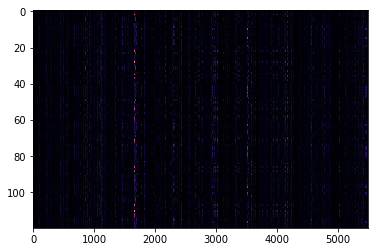

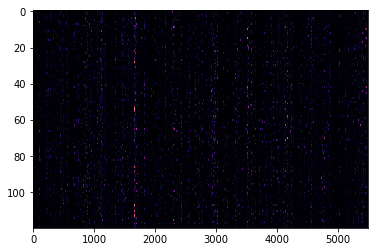

In [167]:
f,ax = plt.subplots()
ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')

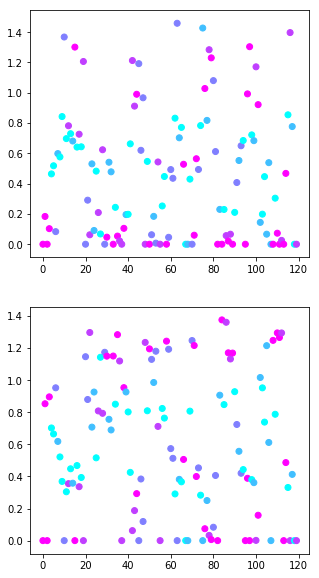

In [93]:
f,ax = plt.subplots(U.shape[1],1,figsize=[5,10])
for factor in range(U.shape[1]):
    ax[factor].scatter(np.arange(120),U[:,factor],c=trial_info['morphs'],cmap='cool')
    #ax[factor].set_ylim([0,2])

(120, 23, 611)
(120,)
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.72529030e-09
 -3.72529030e-09  7.45058060e-09  7.45058060e-09  0.00000000e+00
 -7.45058060e-09  0.00000000e+00  7.45058060e-09  0.00000000e+00
 -3.72529030e-09  3.72529030e-09 -3.72529030e-09 -3.72529030e-09
 -3.72529030e-09  0.00000000e+00  0.00000000e+00  3.72529030e-09
  0.00000000e+00 -7.45058060e-09  0.00000000e+00  7.45058060e-09
 -3.72529030e-09  3.72529030e-09  0.00000000e+00  3.72529030e-09
 -7.45058060e-09  3.72529030e-09  3.72529030e-09 -3.72529030e-09
 -3.72529030e-09  3.72529030e-09  0.00000000e+00  0.00000000e+00
  7.45058060e-09  0.00000000e+00  0.00000000e+00 -3.72529030e-09
  3.72529030e-09  3.72529030e-09  0.00000000e+00 -3.72529030e-09
  3.72529030e-09  3.72529030e-09  0.00000000e+00  7.45058060e-09
 -7.45058060e-09 -3.72529030e-09  7.45058060e-09  3.72529030e-09
 -3.72529030e-09  0.00000000e+00  3.72529030e-09 -1.86264515e-09
  0.00000000e+00  0.00000000e+00  3.72529030e-09  0.00000000e+00
  0

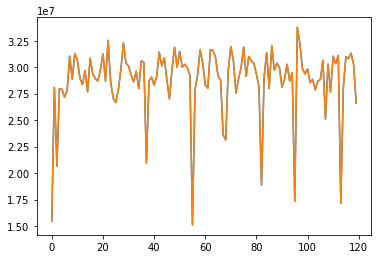

In [128]:
print(C_trial_mat.shape)
trialAct=np.nansum(np.nansum(C_trial_mat,axis=-1),axis=-1)
print(trialAct.shape)
f,ax = plt.subplots()
ax.plot(trialAct)
ax.plot(np.nansum(C_trial_Ncat,axis=-1))
print(trialAct-np.nansum(C_trial_Ncat,axis=-1))

In [39]:
os.sys.path.append("C:\\Users\\mplitt\\nmftools-master\\nmftools")
import ensemble as nmf


NameError: name 'model_args' is not defined

In [ ]:
results = nmf.fit_ensemble_masked(C_trial_Ncat,np.arange(2,15),n_replicates=10)






  0%|                                                                                           | 0/13 [00:00<?, ?it/s]

replicate 0
replicate 1
replicate 2
replicate 3
replicate 4
replicate 5
replicate 6
replicate 7
replicate 8
replicate 9







  8%|██████▏                                                                         | 1/13 [11:09<2:13:59, 669.99s/it]

replicate 0
replicate 1
replicate 2
replicate 3
replicate 4
replicate 5
replicate 6
replicate 7
replicate 8
replicate 9







 15%|████████████▎                                                                   | 2/13 [23:35<2:07:00, 692.77s/it]

replicate 0
replicate 1
replicate 2
replicate 3
replicate 4
replicate 5
replicate 6
replicate 7
replicate 8
replicate 9







 23%|██████████████████▍                                                             | 3/13 [37:01<2:01:05, 726.55s/it]

replicate 0
replicate 1
replicate 2
replicate 3
replicate 4
replicate 5
replicate 6
replicate 7
replicate 8
replicate 9







 31%|████████████████████████▌                                                       | 4/13 [51:38<1:55:45, 771.73s/it]

replicate 0
replicate 1
replicate 2
replicate 3
replicate 4
replicate 5
replicate 6
replicate 7
replicate 8


In [172]:
import plots 

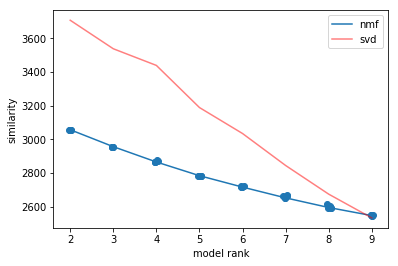

In [187]:
plots.plot_rmse(results)

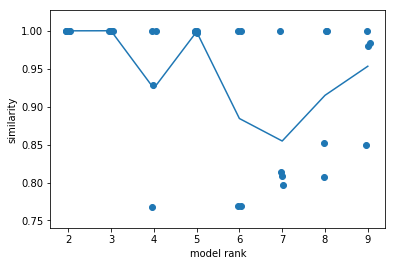

In [174]:
plots.plot_similarity(results)

In [229]:
print(results.keys())
rank = 3

dict_keys([2, 3, 4, 5, 6, 7, 8, 9])


In [230]:
U,Vt = results[rank]['factors'][0][0],results[rank]['factors'][0][1]

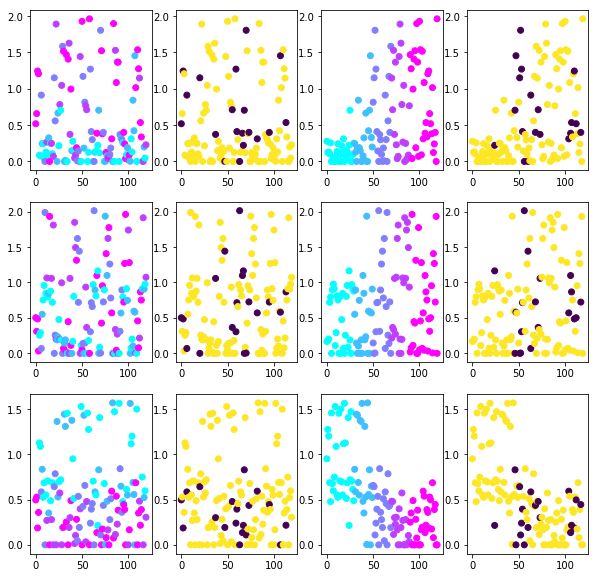

In [231]:
f,ax = plt.subplots(U.shape[1],4,figsize=[10,10])
# ff,aax = plt.subplots(U.shape[1],1,figsize=[5,10])
sort = np.argsort(trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter'])
for factor in range(U.shape[1]):
    ax[factor,0].scatter(np.arange(120),U[:,factor],c=trial_info['morphs'],cmap='cool')
    ax[factor,1].scatter(np.arange(120),U[:,factor],c=trial_info['rewards'],cmap='viridis')
    ax[factor,2].scatter(np.arange(120),U[sort,factor],c=trial_info['morphs'][sort],cmap='cool')
    ax[factor,3].scatter(np.arange(120),U[sort,factor],c=trial_info['rewards'][sort],cmap='viridis')

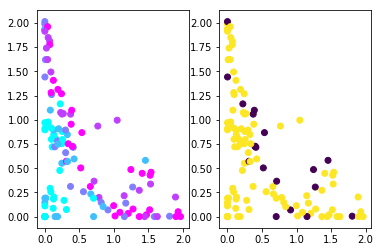

In [234]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[:,0],U[:,1],c=trial_info['morphs'],cmap='cool')
ax[1].scatter(U[:,0],U[:,1],c=trial_info['rewards'],cmap='viridis')

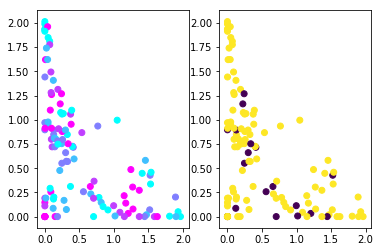

In [235]:
f,ax = plt.subplots(1,2)
ax[0].scatter(U[1:,0],U[1:,1],c=trial_info['morphs'][0:-1],cmap='cool')
ax[1].scatter(U[1:,0],U[1:,1],c=trial_info['rewards'][0:-1],cmap='viridis')

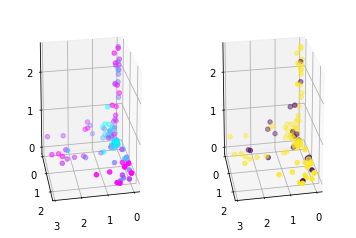

In [228]:
from mpl_toolkits.mplot3d import Axes3D
f= plt.figure()
ax=f.add_subplot(121,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,4],c=trial_info['morphs'],cmap='cool')
ax.view_init(20,80)

ax=f.add_subplot(122,projection='3d')
ax.scatter(U[:,0],U[:,1],U[:,4],c=trial_info['rewards'],cmap='viridis')
ax.view_init(20,80)

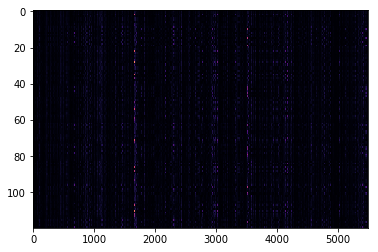

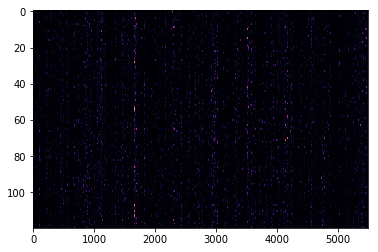

In [197]:
f,ax = plt.subplots()

ax.imshow(np.dot(U,Vt),aspect='auto',cmap='magma')
f,ax = plt.subplots()
ax.imshow(C_trial_Ncat,aspect='auto',cmap='magma')